/tmp/ipykernel_36/2727981478.py:66: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rankings = rankings.set_index(['rank_date'])\


Epoch [1/100], Loss: 0.6626
Epoch [2/100], Loss: 0.6365
Epoch [3/100], Loss: 0.5797
Epoch [4/100], Loss: 0.5600
Epoch [5/100], Loss: 0.5542
Epoch [6/100], Loss: 0.5527
Epoch [7/100], Loss: 0.5531
Epoch [8/100], Loss: 0.5579
Epoch [9/100], Loss: 0.5493
Epoch [10/100], Loss: 0.5520
Epoch [11/100], Loss: 0.5498
Epoch [12/100], Loss: 0.5545
Epoch [13/100], Loss: 0.5442
Epoch [14/100], Loss: 0.5465
Epoch [15/100], Loss: 0.5442
Epoch [16/100], Loss: 0.5429
Epoch [17/100], Loss: 0.5471
Epoch [18/100], Loss: 0.5439
Epoch [19/100], Loss: 0.5422
Epoch [20/100], Loss: 0.5406
Epoch [21/100], Loss: 0.5432
Epoch [22/100], Loss: 0.5391
Epoch [23/100], Loss: 0.5409
Epoch [24/100], Loss: 0.5371
Epoch [25/100], Loss: 0.5375
Epoch [26/100], Loss: 0.5384
Epoch [27/100], Loss: 0.5422
Epoch [28/100], Loss: 0.5447
Epoch [29/100], Loss: 0.5352
Epoch [30/100], Loss: 0.5381
Epoch [31/100], Loss: 0.5352
Epoch [32/100], Loss: 0.5402
Epoch [33/100], Loss: 0.5397
Epoch [34/100], Loss: 0.5310
Epoch [35/100], Loss: 0

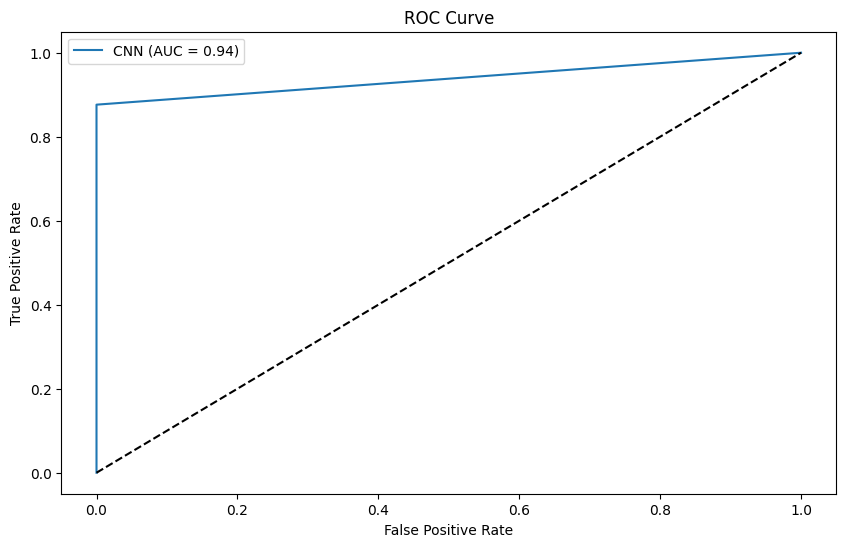

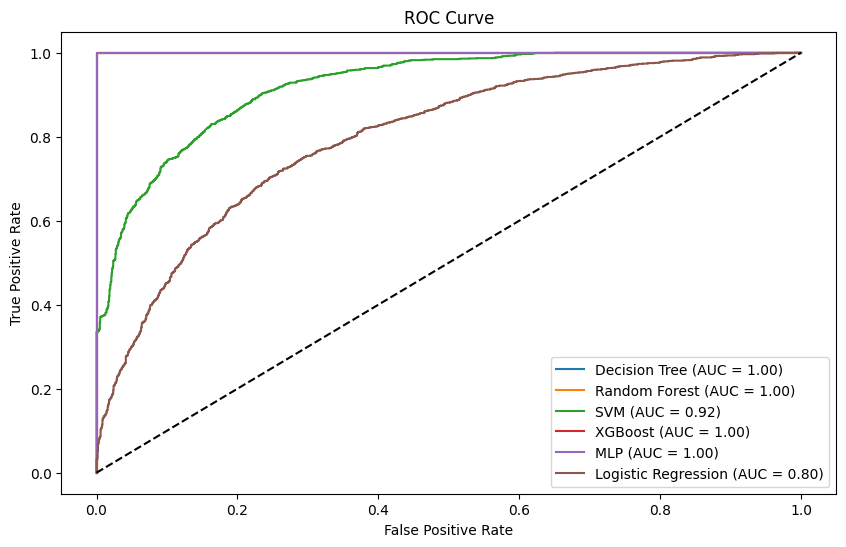

___Starting group B:___
Portugal vs. Spain: Spain wins with 1.00
Portugal vs. Morocco: Morocco wins with 1.00
Portugal vs. Iran: Iran wins with 1.00
Spain vs. Morocco: Morocco wins with 1.00
Spain vs. Iran: Iran wins with 1.00
Morocco vs. Iran: Iran wins with 1.00
___Starting group E:___
Brazil vs. Switzerland: Switzerland wins with 1.00
Brazil vs. Costa Rica: Costa Rica wins with 1.00
Brazil vs. Serbia: Serbia wins with 1.00
Switzerland vs. Costa Rica: Costa Rica wins with 1.00
Switzerland vs. Serbia: Serbia wins with 1.00
Costa Rica vs. Serbia: Serbia wins with 1.00
___Starting group G:___
Belgium vs. Panama: Panama wins with 1.00
Belgium vs. Tunisia: Tunisia wins with 1.00
Belgium vs. England: England wins with 1.00
Panama vs. Tunisia: Tunisia wins with 1.00
Panama vs. England: England wins with 1.00
Tunisia vs. England: England wins with 1.00
___Starting group C:___
France vs. Australia: Australia wins with 1.00
France vs. Peru: Peru wins with 1.00
France vs. Denmark: Denmark wins 

/tmp/ipykernel_36/2727981478.py:266: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.367890415262696e-36' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  world_cup.loc[home, 'total_prob'] += home_win_prob


In [11]:
# 插入数据库
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

rankings = pd.read_csv('../input/fifa-international-soccer-mens-ranking-1993now/fifa_ranking.csv')
#使用Pandas的read_csv函数从名为"fifa_ranking.csv"的文件中读取数据，并将其存储在名为rankings的DataFrame中。
rankings = rankings.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'rank_date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]
#从rankings DataFrame中选择特定的列，包括排名、完整国家名称、国家缩写、当前年度加权平均、排名日期、两年前加权平均和三年前加权平均。
rankings = rankings.replace({"IR Iran": "Iran"})
#将rankings DataFrame中的"IR Iran"替换为"Iran"。
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']
#计算每个球队的加权积分，即当前年度加权平均、两年前加权平均和三年前加权平均的总和，并将结果存储在名为weighted_points的新列中。
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])
#将rankings DataFrame中的排名日期列转换为日期时间格式。
matches = pd.read_csv('../input/international-football-results-from-1872-to-2017/results.csv')
#使用Pandas的read_csv函数从名为"results.csv"的文件中读取数据，并将其存储在名为matches的DataFrame中。
matches =  matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})
#将matches DataFrame中的'Germany DR'替换为'Germany'，将'China'替换为'China PR'。
matches['date'] = pd.to_datetime(matches['date'])
#将matches DataFrame中的日期列转换为日期时间格式。
world_cup = pd.read_csv('../input/fifa-worldcup-2018-dataset/World Cup 2018 Dataset.csv')
#使用Pandas的read_csv函数从名为"World Cup 2018 Dataset.csv"的文件中读取数据，并将其存储在名为world_cup的DataFrame中。
world_cup = world_cup.loc[:, ['Team', 'Group', 'First match \nagainst', 'Second match\n against', 'Third match\n against']]
#从world_cup DataFrame中选择特定的列，包括球队名称、小组、第一场比赛对手、第二场比赛对手和第三场比赛对手。
world_cup = world_cup.dropna(how='all')
#删除world_cup DataFrame中所有值均为NaN的行。
world_cup = world_cup.replace({"IRAN": "Iran", 
                               "Costarica": "Costa Rica", 
                               "Porugal": "Portugal", 
                               "Columbia": "Colombia", 
                               "Korea" : "Korea Republic"})
#将world_cup DataFrame中的"IRAN"替换为"Iran"，"Costarica"替换为"Costa Rica"，"Porugal"替换为"Portugal"，"Columbia"替换为"Colombia"，"Korea"替换为"Korea Republic"。
world_cup = world_cup.set_index('Team')
#将world_cup DataFrame中的球队名称设置为索引。
# # 这段代码的目的是为了确保每一天都有球队的排名数据。
# # I want to have the ranks for every day 
# # 首先，对排名数据集进行了一些处理：
# rankings = rankings.set_index(['rank_date'])\   
#             .groupby(['country_full'], group_keys=False)\ 
#             .resample('D').first()\  
#             .fillna(method='ffill')\  
#             .reset_index()  
# #接下来，将比赛数据与排名数据进行连接：
# # join the ranks
# matches = matches.merge(rankings, 
#                         left_on=['date', 'home_team'], 
#                         right_on=['rank_date', 'country_full'])
# #将比赛数据与排名数据进行左连接，连接条件是比赛日期和主队名称，以及排名日期和球队名称。
# matches = matches.merge(rankings, 
#                         left_on=['date', 'away_team'], 
#                         right_on=['rank_date', 'country_full'], 
#                         suffixes=('_home', '_away'))
# #将比赛数据与排名数据进行左连接，连接条件是比赛日期和客队名称，
# #以及排名日期和球队名称，同时为主队和客队的排名数据添加后缀以区分。
# #通过这些操作，确保了每一场比赛都有了主队和客队在比赛当天的排名数据。

# I want to have the ranks for every day 
rankings = rankings.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()

# join the ranks
matches = matches.merge(rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])
matches = matches.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))
# 这段代码用于生成特征
# feature generation
matches['rank_difference'] = matches['rank_home'] - matches['rank_away']  #计算主队排名和客队排名之间的差异。
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2  #计算主队排名和客队排名的平均值。
matches['point_difference'] = matches['weighted_points_home'] - matches['weighted_points_away']  #计算主队加权积分和客队加权积分之间的差异。
matches['score_difference'] = matches['home_score'] - matches['away_score']  #计算主队得分和客队得分之间的差异。
matches['is_won'] = matches['score_difference'] > 0 # take draw as lost 判断比赛结果是否为胜利（主队得分大于客队得分，包括平局情况）。
matches['is_stake'] = matches['tournament'] != 'Friendly' #判断比赛是否具有一定的赌注（不是友谊赛）。

# 定义CNN模型
class CNNModel(nn.Module):
    def __init__(self, input_channels, input_length):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64, 64)  
        self.fc2 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.relu(self.conv3(x))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers
        x = self.dropout(torch.relu(self.fc1(x)))
        x = torch.sigmoid(self.fc2(x))
        return x

    def predict_proba(self, X):
        self.eval()
        with torch.no_grad():
            inputs = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
            outputs = self.forward(inputs)
            return torch.cat((1 - outputs, outputs), dim=1).numpy()
        
# 特征和目标变量
feature_columns = ['rank_difference', 'average_rank', 'point_difference', 'score_difference', 'is_stake']
X = matches[feature_columns].fillna(0).values.astype(np.float32)
y = matches['is_won'].astype(float).fillna(0).values.astype(np.float32)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # 加入通道维度
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 定义函数
def train_and_evaluate_cnn(model, train_loader, X_test, y_test, learning_rate=0.001, epochs=100):
    criterion = nn.BCEWithLogitsLoss()  # 损失函数
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # 优化器
    
    # 获取设备信息（CPU 或 GPU）
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # 训练阶段
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X_batch.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

    # 评估阶段
    model.eval()
    with torch.no_grad():
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1).to(device)
        logits = model(X_test_tensor)
        y_pred_prob = torch.sigmoid(logits).cpu().numpy().ravel()  # 使用Sigmoid转换logits为概率
    
    # 确保y_test是NumPy数组，并且只有两个独特的值（0和1）
    y_test = np.array(y_test).ravel()
    
    # 检查y_test的类数
    unique_classes = np.unique(y_test)
    if len(unique_classes) < 2:
        print(f"Warning: Only one class present in y_test ({unique_classes}). ROC AUC score is not defined in that case.")
    else:
        # 计算ROC曲线和AUC值
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        
        # 绘制ROC曲线
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, label=f'CNN (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

# 实例化CNN模型并训练
input_channels = 1  # 一维数据输入
input_length = X_train_tensor.shape[2]  # 输入的长度
model_cnn = CNNModel(input_channels, input_length)

# 调用训练和评估函数
train_and_evaluate_cnn(model_cnn, train_loader, X_test, y_test)
        
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义模型
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000),
    "Logistic Regression": LogisticRegression(C=1e-5)
}

# 绘制 ROC 曲线和计算 AUC 值
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()    

#小组赛
from itertools import combinations
# 定义 margin
margin = 0.05

# 更新 world_cup_rankings 数据
world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'].max()) & 
                                  rankings['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

# 定义对手
world_cup['points'] = 0
world_cup['total_prob'] = 0

def prepare_data_for_cnn(home, away, world_cup, world_cup_rankings, model_cnn):
    home_rank = world_cup_rankings.loc[home, 'rank']
    home_points = world_cup_rankings.loc[home, 'weighted_points']
    opp_rank = world_cup_rankings.loc[away, 'rank']
    opp_points = world_cup_rankings.loc[away, 'weighted_points']

    # 设置特征值
    row = pd.DataFrame({
        'rank_difference': [home_rank - opp_rank],
        'average_rank': [(home_rank + opp_rank) / 2],
        'point_difference': [home_points - opp_points],
        'score_difference': [0],
        'is_stake': [True]
    })

    # 确保 row 数据为数值型并具有正确的形状
    row_values = row.values.astype(float).reshape(1, -1)

    # 使用模型预测主队获胜的概率
    home_win_prob = model_cnn.predict_proba(row_values)[:, 1][0]
    world_cup.loc[home, 'total_prob'] += home_win_prob
    world_cup.loc[away, 'total_prob'] += 1 - home_win_prob
    points = 0
    
    if home_win_prob <= 0.5 - margin:
        print("{} wins with {:.2f}".format(away, 1 - home_win_prob))
        world_cup.loc[away, 'points'] += 3
    elif home_win_prob > 0.5 - margin and home_win_prob < 0.5 + margin:
        print("Draw")
        world_cup.loc[home, 'points'] += 1
        world_cup.loc[away, 'points'] += 1
    elif home_win_prob >= 0.5 + margin:
        points = 3
        world_cup.loc[home, 'points'] += 3
        print("{} wins with {:.2f}".format(home, home_win_prob))

# 调用函数
for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        prepare_data_for_cnn(home, away, world_cup, world_cup_rankings, model_cnn)




#这段代码用于模拟世界杯的淘汰赛阶段，并输出每场比赛的预测结果和赔率。
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]
#定义了每一轮比赛的对阵情况，即哪两支球队将会比赛。
world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
#根据球队的小组排名、得分和总概率进行排序，并重新设置索引。
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
#从每个小组中选择排名前两名的球队，进入下一轮比赛。
next_round_wc = next_round_wc.reset_index()
#重置索引，以便后续的数据处理。
next_round_wc = next_round_wc.loc[pairing]
#根据预先定义的对阵情况对球队进行重新排序。
next_round_wc = next_round_wc.set_index('Team')
#将球队名称设置为索引，以便后续的数据操作。

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
#定义了淘汰赛阶段的名称，包括16强、8强、4强和决赛。

labels = list()
odds = list()

for f in finals: #遍历所有淘汰赛阶段。
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2) #计算每轮比赛的轮次，即每一轮比赛需要进行的次数。home和away分别表示比赛中的主队和客队。
    winners = []

    #通过模型预测每场比赛的结果，并根据预测结果输出比赛胜利方和胜率。根据预测结果，将胜利方添加到winners列表中。
    #将胜利方球队放入下一轮比赛的next_round_wc中，并输出下一轮比赛的对阵情况。
    #将每场比赛的预测赔率和标签信息添加到odds和labels列表中，用于后续的可视化分析。
    for i in range(iterations):
        home = next_round_wc.index[i*2] #从下一轮比赛的数据中获取主队和客队的名称。
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,away), end='')
        columns = ['average_rank', 'rank_difference', 'point_difference', 'score_difference', 'is_stake']
        row = pd.DataFrame([[np.nan, np.nan, np.nan, np.nan, True]], columns=columns)
        #创建一个DataFrame，用于存储模型预测所需的特征值。这里采用了与之前类似的方式来构建一个包含NaN值的DataFrame。
        
        home_rank = world_cup_rankings.loc[home, 'rank'] #获取主队的排名和加权积分。
        home_points = world_cup_rankings.loc[home, 'weighted_points'] 
        opp_rank = world_cup_rankings.loc[away, 'rank'] #获取客队的排名和加权积分。
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        
        row['average_rank'] = (home_rank + opp_rank) / 2 #计算主客队排名的平均值，并将其赋值给特征average_rank。
        row['rank_difference'] = home_rank - opp_rank #计算主队排名与客队排名的差值，并将其赋值给特征rank_difference。
        row['point_difference'] = home_points - opp_points #计算主队加权积分与客队加权积分的差值，并将其赋值给特征point_difference。
        row['score_difference'] = 0
        
        # 确保 row 数据为数值型
        row_values = row.values.astype(float)
        
        home_win_prob = model_cnn.predict_proba(row_values)[:,1][0] #使用模型预测主队获胜的概率。
        if home_win_prob <= 0.5: #如果模型预测主队获胜的概率小于等于0.5，则认为客队获胜。
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away) #将客队添加到获胜者列表中。
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        # 将每场比赛的标签信息添加到标签列表中，包括主客队名称和预测赔率。
        if home_win_prob == 0:  # 检查主队胜率是否为0，避免除以0
            home_odds = float('inf')  # 赔率设为无穷大，表示不可能获胜
        else:
             home_odds = 1 / home_win_prob  # 正常计算赔率

        if home_win_prob == 1:  # 检查主队胜率是否为1，避免除以0
            away_odds = float('inf')  # 赔率设为无穷大，表示不可能获胜
        else:
            away_odds = 1 / (1 - home_win_prob)  # 正常计算赔率

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(
            world_cup_rankings.loc[home, 'country_abrv'], 
            home_odds, 
            world_cup_rankings.loc[away, 'country_abrv'], 
            away_odds
         ))
        #将每场比赛的标签信息添加到标签列表中，包括主客队名称和预测赔率。
        odds.append([home_win_prob, 1-home_win_prob])
        #将每场比赛的赔率信息添加到赔率列表中，包括主队获胜的概率和客队获胜的概率。
                
    next_round_wc = next_round_wc.loc[winners]
    #更新下一轮比赛的数据，将胜利方球队作为下一轮的参与者。
    print("\n") #在每一轮比赛结束后打印一个空行，用于分隔不同轮次的比赛。